## QUESTION  1



### PART A

W,X,Y



### PART B
The selected charts provide important summaries of key business information to help manage the​ business, and are easy to read and interpret.


## QUESTION 2

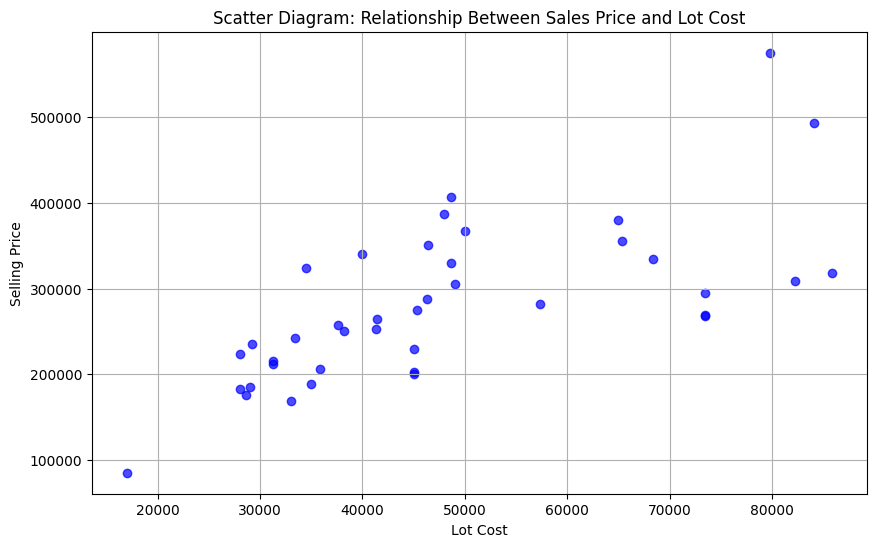

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# Data in string format
data_homebuilder = """
Selling Price	Lot Cost
85145	17030
168500	33000
175470	28600
183370	28000
185160	29000
189120	35000
200119	45000
203076	45025
206400	35851
211513	31300
214900	31300
223890	28000
230000	45025
234971	29202
242191	33434
249900	38200
253055	41340
257040	37631
265058	41404
267640	73400
269410	73400
274903	45345
281487	57285
287771	46300
294450	73400
305000	49067
309075	82250
318274	85800
323716	34500
329611	48611
335000	68375
340000	40000
350702	46386
355688	65373
367600	50000
379424	64902
387527	48000
407076	48668
492820	84122
575120	79790
"""

data_homebuilder = data_homebuilder.replace("\t",",")

# Read data from string into a pandas DataFrame
df_homebuilder = pd.read_csv(io.StringIO(data_homebuilder))

# Create Scatter Diagram
plt.figure(figsize=(10, 6))
plt.scatter(df_homebuilder['Lot Cost'], df_homebuilder['Selling Price'], color='blue', alpha=0.7)
plt.xlabel('Lot Cost')
plt.ylabel('Selling Price')
plt.title('Scatter Diagram: Relationship Between Sales Price and Lot Cost')
plt.grid(True)
plt.show()


## QUESTION 3


Parsed DataFrame (months as rows, expense categories as columns):

Expenses   Cost of Goods  Advertising  Salaries  Supplies  Miscellaneous
Month                                                                   
April               2540         3000     18700      1200          16200
May                 2840         3100     18700      1240          15800
June                2930         3000     18700      1350          16200
July                3200         3400     20850      1430          17100
August              3240         3600     20850      1440          17500
September           3060         2500     20850      1380          16900
October             2880         1900     18700      1360          16100
November            2580         2100     18700      1290          15800
December            2270         2000     18700      1200          15200


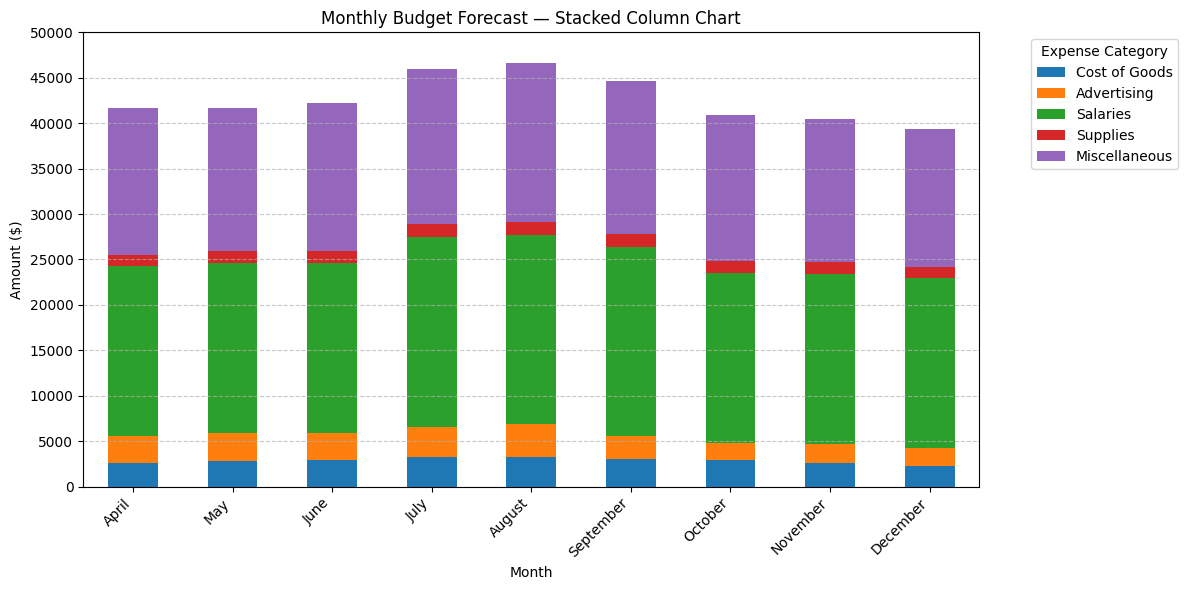

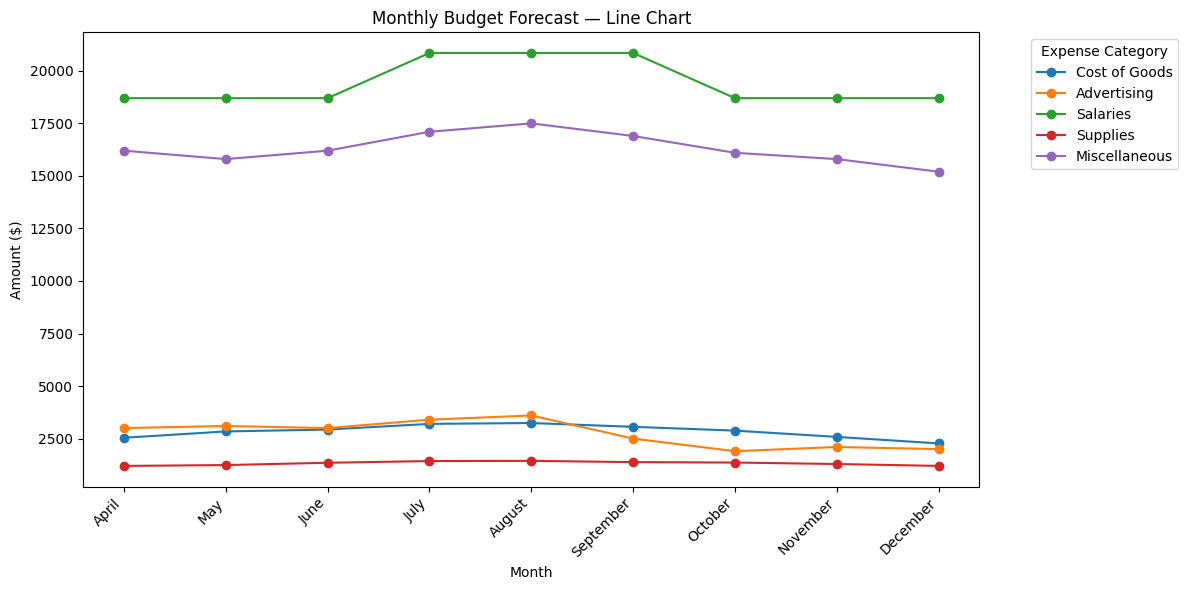


Recommended multiple-choice answer: A

Why A? The stacked column chart clearly shows each month's total expenses and the contribution (proportion) of each category to that total. The line chart highlights trends for each expense category across months, but because 'Salaries' and 'Miscellaneous' are much larger than other series, the smaller series appear compressed which can make direct comparison harder.


In [9]:
# Parsing the provided budget string, creating a stacked column chart and a line chart,
# and displaying the parsed DataFrame for review.
# The data is provided as a single string (exactly as you gave it). 
# Charts use matplotlib (no seaborn) and each chart is on its own figure (per instructions).

from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

data_string = """
Expenses	April	May	June	July	August	September	October	November	December
Cost of Goods	2,540	2,840	2,930	3,200	3,240	3,060	2,880	2,580	2,270
Advertising	3,000	3,100	3,000	3,400	3,600	2,500	1,900	2,100	2,000
Salaries	18,700	18,700	18,700	20,850	20,850	20,850	18,700	18,700	18,700
Supplies	1,200	1,240	1,350	1,430	1,440	1,380	1,360	1,290	1,200
Miscellaneous	16,200	15,800	16,200	17,100	17,500	16,900	16,100	15,800	15,200
"""

# Try reading with tab separator first (the string uses tabs as provided).
df_raw = pd.read_csv(StringIO(data_string.strip()), sep='\t', engine='python', dtype=str)

# Clean numeric values (remove commas) and convert to integers
clean = df_raw.copy()
months = clean.columns.tolist()[1:]
for m in months:
    clean[m] = clean[m].str.replace(',', '').astype(int)

# Pivot so months are rows and expense categories are columns (good for plotting)
df = clean.set_index('Expenses').T
df.index.name = 'Month'

# Display DataFrame to the user (as an interactive table if available)
try:
    import caas_jupyter_tools as cjt
    cjt.display_dataframe_to_user("Budget Forecast (Monthly)", df.reset_index())
except Exception:
    # fallback: print the dataframe
    print("\nParsed DataFrame (months as rows, expense categories as columns):\n")
    print(df)

# --- Stacked Column Chart with Y-axis lines every $5,000 ---
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Monthly Budget Forecast — Stacked Column Chart')
ax.set_xlabel('Month')
ax.set_ylabel('Amount ($)')
ax.legend(title='Expense Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis major ticks at 5000 intervals
ymin, ymax = ax.get_ylim()
ax.set_yticks(range(0, int(ymax) + 5000, 5000))
ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.8, alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- Line Chart ---
fig2, ax2 = plt.subplots(figsize=(12, 6))
for col in df.columns:
    ax2.plot(df.index, df[col], marker='o', label=col)
ax2.set_title('Monthly Budget Forecast — Line Chart')
ax2.set_xlabel('Month')
ax2.set_ylabel('Amount ($)')
ax2.legend(title='Expense Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print a short interpretation and the chosen multiple-choice answer
print("\nRecommended multiple-choice answer: A\n")
print("Why A? The stacked column chart clearly shows each month's total expenses "
      "and the contribution (proportion) of each category to that total. "
      "The line chart highlights trends for each expense category across months, "
      "but because 'Salaries' and 'Miscellaneous' are much larger than other series, "
      "the smaller series appear compressed which can make direct comparison harder.")



## Question 4

In [7]:
import pandas as pd
from io import StringIO
import matplotlib.colors as mcolors

# Data as a multi-line string
data_string = """
Median Age	Median Years Education	Median Income	Median Home Value	Median Household Wealth	Average Bank Balance
30.1	13.3	$50,197	$124,263	$148,954	$22,246
35.3	14.4	$74,737	$185,013	$221,776	$42,867
22.3	11.6	$13,386	$33,137	$39,721	$7,321
34.6	14.3	$71,391	$176,729	$211,846	$52,341
28.7	13	$43,504	$107,694	$129,094	$22,976
29.6	12.1	$29,375	$52,096	$24,999	$13,693
39.4	16.1	$111,548	$230,893	$331,009	$56,569
36.6	13.9	$76,507	$149,880	$189,727	$34,811
35.7	16.1	$107,935	$276,139	$211,085	$41,032
37.5	12.5	$66,667	$78,906	$143,750	$31,758
39.3	14.4	$80,615	$181,265	$201,743	$38,766
34.4	12.7	$65,625	$129,688	$175,000	$29,127
30.3	12.2	$9,354	$91,708	$24,999	$9,904
33.8	13.6	$76,771	$159,531	$197,264	$37,996
35.3	12.7	$51,419	$104,149	$111,168	$24,558
38.1	12.7	$47,388	$92,820	$118,016	$24,890
30.5	12.8	$21,433	$83,456	$24,999	$11,380
35.9	14.8	$91,033	$183,104	$220,741	$38,517
37.5	12.8	$51,182	$106,898	$88,370	$23,584
37.1	12.5	$46,176	$92,654	$101,964	$23,858
34.8	13.7	$75,591	$155,334	$188,310	$36,708
33.9	12.1	$32,813	$40,313	$79,167	$26,405
35.9	12.4	$51,818	$80,357	$135,185	$26,242
36.7	12.8	$48,631	$95,490	$105,202	$23,610
38	13.6	$53,890	$108,446	$95,013	$26,542
41.7	13	$48,439	$100,788	$124,474	$31,054
30.8	11.9	$17,992	$46,885	$24,999	$10,679
37.2	12.6	$36,789	$86,563	$69,764	$20,020
32.7	12.2	$35,625	$64,737	$76,321	$17,077
40.4	16.1	$61,091	$194,928	$113,559	$32,150
35.3	13.2	$64,879	$135,951	$148,868	$28,162
37.2	12.5	$54,044	$108,654	$140,726	$27,753
36.4	12.9	$38,184	$80,099	$76,438	$21,534
34.4	12.8	$60,753	$95,869	$143,115	$26,773
37.6	12.9	$38,596	$95,364	$54,453	$17,939
36.1	12.4	$31,770	$74,525	$47,446	$15,912
34.8	12.5	$42,401	$106,478	$94,867	$21,572
40.7	12.7	$52,500	$94,792	$147,222	$28,867
36.8	13.8	$72,245	$142,732	$176,926	$35,206
39.8	13.4	$46,036	$99,508	$98,343	$27,005
28.7	12.1	$32,574	$50,244	$49,662	$14,393
42.4	12.6	$31,563	$81,597	$71,759	$15,961
36.6	14.1	$56,803	$149,138	$101,695	$29,198
22	12	$14,115	$53,923	$24,999	$9,071
33.2	12.3	$31,250	$91,049	$52,976	$18,959
33.6	12.7	$64,792	$116,071	$185,714	$32,677
36.4	12.5	$37,083	$70,909	$95,833	$21,670
37.8	12.9	$45,286	$108,431	$91,928	$28,174
34.9	12.4	$52,392	$93,875	$133,101	$24,650
33.4	12.6	$54,986	$105,647	$126,929	$24,671
"""

# Convert string data to DataFrame
df = pd.read_csv(StringIO(data_string), sep='\t')

# Convert currency columns to numeric
df['Median Income'] = df['Median Income'].replace('[\$,]', '', regex=True).astype(float)
df['Median Home Value'] = df['Median Home Value'].replace('[\$,]', '', regex=True).astype(float)
df['Median Household Wealth'] = df['Median Household Wealth'].replace('[\$,]', '', regex=True).astype(float)
df['Average Bank Balance'] = df['Average Bank Balance'].replace('[\$,]', '', regex=True).astype(float)

# Apply data bars for Median Home Value
df_styled = df.style.bar(subset=['Median Home Value'], color='lightgrey')

# Create a custom colormap with specified colors
colors = ['aqua', 'yellow', 'olive', 'lime', 'gray']
cmap = mcolors.ListedColormap(colors)

# Apply custom color scale for Median Household Wealth
df_styled = df_styled.background_gradient(subset=['Median Household Wealth'], cmap=cmap)

# Apply icon set for Average Bank Balance
df_styled = df_styled.apply(lambda x: ['color: green' if v > 30000 else ('color: red' if v < 10000 else 'color: orange') for v in x], subset=['Average Bank Balance'])

df_styled


<>:64: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:65: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:66: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:67: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:64: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:65: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:66: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences wil

,Median Age,Median Years Education,Median Income,Median Home Value,Median Household Wealth,Average Bank Balance
0,30.100000,13.300000,50197.000000,124263.000000,148954.000000,22246.000000
1,35.300000,14.400000,74737.000000,185013.000000,221776.000000,42867.000000
2,22.300000,11.600000,13386.000000,33137.000000,39721.000000,7321.000000
3,34.600000,14.300000,71391.000000,176729.000000,211846.000000,52341.000000
4,28.700000,13.000000,43504.000000,107694.000000,129094.000000,22976.000000
5,29.600000,12.100000,29375.000000,52096.000000,24999.000000,13693.000000
6,39.400000,16.100000,111548.000000,230893.000000,331009.000000,56569.000000
7,36.600000,13.900000,76507.000000,149880.000000,189727.000000,34811.000000
8,35.700000,16.100000,107935.000000,276139.000000,211085.000000,41032.000000
9,37.500000,12.500000,66667.000000,78906.000000,143750.000000,31758.000000
